<h1>Simulation of the time response of a 2-DOF system</h1>

## Table of Contents

* [Free decay response](#1)
* [Forced system (harmonically excited)](#2)
* [Forced system (randomly excited)](#3)


<img src="2DOF-F2_body.png" width="500">

## Defining the TDOFsystem function 

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#### The function TDOFsystem simulates a Two-DOF system #### 
#### Excitation only in Force 2 ####

def T2DOFsystem(t, z, Tspan, u, SP):
    m1, c1, k1 = SP['m1'], SP['c1'], SP['k1']
    m2, c2, k2 = SP['m2'], SP['c2'], SP['k2']

    # Input forces
    u_interp = np.interp(t, Tspan, u)                                                   #force interpolation 

    # State vector
    zdot = np.zeros(4)

    zdot[0] = z[2]                                                                      # x1dot
    zdot[1] = z[3]                                                                      # x2dot
    zdot[2] = (-c1 * z[2] - c2 * (z[2] - z[3]) - k1 * z[0] - k2 * (z[0] - z[1])) / m1   # x1dotdot
    zdot[3] = (-c2 * (z[3] - z[2]) - k2 * (z[1] - z[0]) + u_interp) / m2                # x2dotdot

    return zdot


## Free decay response <a class="anchor" id="1"></a>

##### System parameters, Initial conditions & Loading

In [2]:
# System parameters
SP = {
    'm1': 10, 'm2': 10,   # Mass (kg)
    'k1': 250, 'k2': 50,  # Stiffness (N/m)
    'c1': 0.5, 'c2': 0.5  # Damping coefficient (Ns^2/m)
}

# Initial conditions [x1 x2 x1dot x2dot] units [m, m, m/s, m/s]
IC = np.array([0, 0.01, 0, 0])     # Initial conditions 
N = 600                            # Blocksize 
fs = 4                             # sampling 
Tspan = np.arange(N) / fs          # Time vector

# Define the zero external forces
u = np.zeros(N)

##### Solving the model

In [3]:
# Solve ODE using odeint (Runge-Kutta scheme)
def system(z, t):
    return T2DOFsystem(t, z, Tspan, u, SP)

Zsim = odeint(system, IC, Tspan)

# Initialize Zsimdot
Zsimdot = np.zeros((N, 4))    #Derivative of Zsim 

# Calculate acceleration based on the simulated state vector
for t in range(N):
    t_current = Tspan[t]
    z_current = Zsim[t, :]
    u_current = u[t]
    Zsimdot[t, :] = T2DOFsystem(t_current, z_current, Tspan, u, SP)

##### Ploting responses

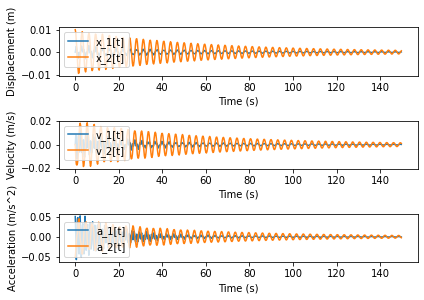

In [4]:
# Plot simulated outputs
plt.figure(1)

# Plot displacement
plt.subplot(311)
plt.plot(Tspan, Zsim[:, 0], label='x_1[t]')
plt.plot(Tspan, Zsim[:, 1], label='x_2[t]')
plt.legend()
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

# Plot velocity
plt.subplot(312)
plt.plot(Tspan, Zsim[:, 2], label='v_1[t]')
plt.plot(Tspan, Zsim[:, 3], label='v_2[t]')
plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')

# Plot acceleration
plt.subplot(313)
plt.plot(Tspan, Zsimdot[:, 2], label='a_1[t]')
plt.plot(Tspan, Zsimdot[:, 3], label='a_2[t]')
plt.legend()
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### Forced system (harmonically excited) <a class="anchor" id="2"></a>

##### System parameters, Initial conditions & Loading

In [5]:
# Initial conditions [x1 x2 x1dot x2dot] units [m, m, m/s, m/s]
IC = np.array([0, 0, 0, 0])        # Initial conditions 
N = 600                            # Blocksize 
fs = 4                             # sampling 
Tspan = np.arange(N) / fs          # Time vector

# Define the external forces
u = np.sin(1.57*Tspan)             # F2 external force (0.25 Hz)

##### Solving the model

In [6]:
# Solve ODE using odeint (Runge-Kutta scheme)
def system(z, t):
    return T2DOFsystem(t, z, Tspan, u, SP)

Zsim = odeint(system, IC, Tspan)

# Initialize Zsimdot
Zsimdot = np.zeros((N, 4))

# Calculate acceleration based on the simulated state vector
for t in range(N):
    t_current = Tspan[t]
    z_current = Zsim[t, :]
    u_current = u[t]
    Zsimdot[t, :] = T2DOFsystem(t_current, z_current, Tspan, u, SP)

##### Ploting responses

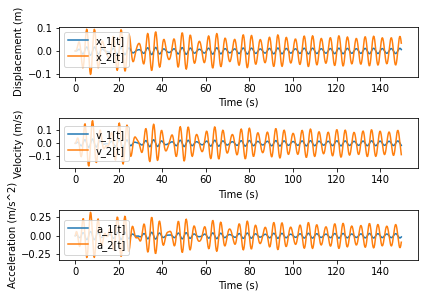

In [7]:
# Plot simulated outputs
plt.figure(1)

# Plot displacement
plt.subplot(311)
plt.plot(Tspan, Zsim[:, 0], label='x_1[t]')
plt.plot(Tspan, Zsim[:, 1], label='x_2[t]')
plt.legend()
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

# Plot velocity
plt.subplot(312)
plt.plot(Tspan, Zsim[:, 2], label='v_1[t]')
plt.plot(Tspan, Zsim[:, 3], label='v_2[t]')
plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')

# Plot acceleration
plt.subplot(313)
plt.plot(Tspan, Zsimdot[:, 2], label='a_1[t]')
plt.plot(Tspan, Zsimdot[:, 3], label='a_2[t]')
plt.legend()
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### Forced system (random excited) <a class="anchor" id="3"></a>

##### System parameters, Initial conditions & Loading

In [8]:
# Initial conditions [x1 x2 x1dot x2dot] units [m, m, m/s, m/s]
IC = np.array([0, 0, 0, 0])        # Initial conditions 
N = 600                            # Blocksize 
fs = 4                             # sampling 
Tspan = np.arange(N) / fs          # Time vector

# Define the zero external forces
u = np.random.randn(N)             # Random excitation

##### Solving the model

In [9]:
# Solve ODE using odeint (Runge-Kutta scheme)
def system(z, t):
    return T2DOFsystem(t, z, Tspan, u, SP)

Zsim = odeint(system, IC, Tspan)

# Initialize Zsimdot
Zsimdot = np.zeros((N, 4))

# Calculate acceleration based on the simulated state vector
for t in range(N):
    t_current = Tspan[t]
    z_current = Zsim[t, :]
    u_current = u[t]
    Zsimdot[t, :] = T2DOFsystem(t_current, z_current, Tspan, u, SP)

##### Ploting responses

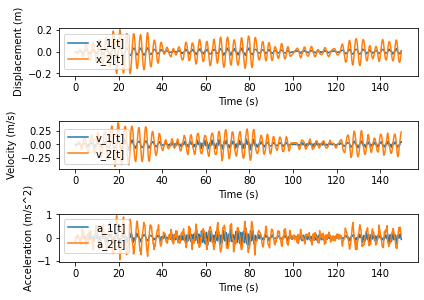

In [10]:
import matplotlib.pyplot as plt

# Plot simulated outputs
plt.figure(1)

# Plot displacement
plt.subplot(311)
plt.plot(Tspan, Zsim[:, 0], label='x_1[t]')
plt.plot(Tspan, Zsim[:, 1], label='x_2[t]')
plt.legend()
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

# Plot velocity
plt.subplot(312)
plt.plot(Tspan, Zsim[:, 2], label='v_1[t]')
plt.plot(Tspan, Zsim[:, 3], label='v_2[t]')
plt.legend()
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')

# Plot acceleration
plt.subplot(313)
plt.plot(Tspan, Zsimdot[:, 2], label='a_1[t]')
plt.plot(Tspan, Zsimdot[:, 3], label='a_2[t]')
plt.legend()
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
